<a href="https://colab.research.google.com/github/sanjithrana/AI-ML-TASKS-1/blob/main/AI_%26_ML_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv("/content/Titanic-Dataset (1).csv")


In [3]:
# 1. Basic Info
df.shape

(891, 12)

In [4]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# 2. Summary Statistics
df.describe(include="all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns: {numeric_cols}")

Numeric columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


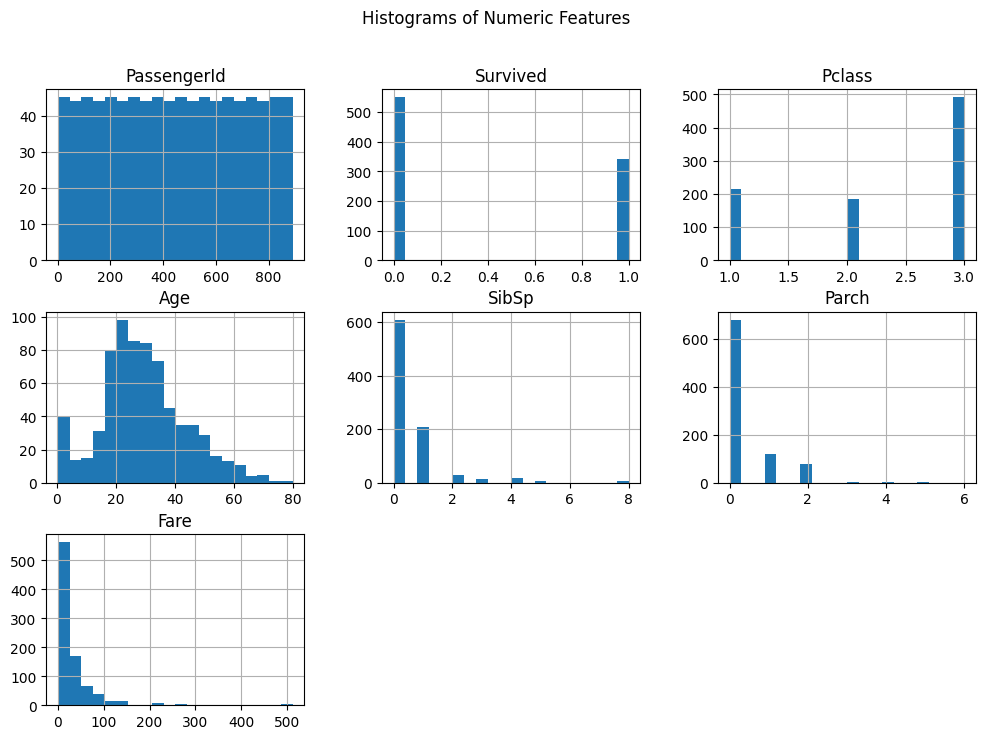

In [8]:
# 3. Histograms for Numerical Features
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()

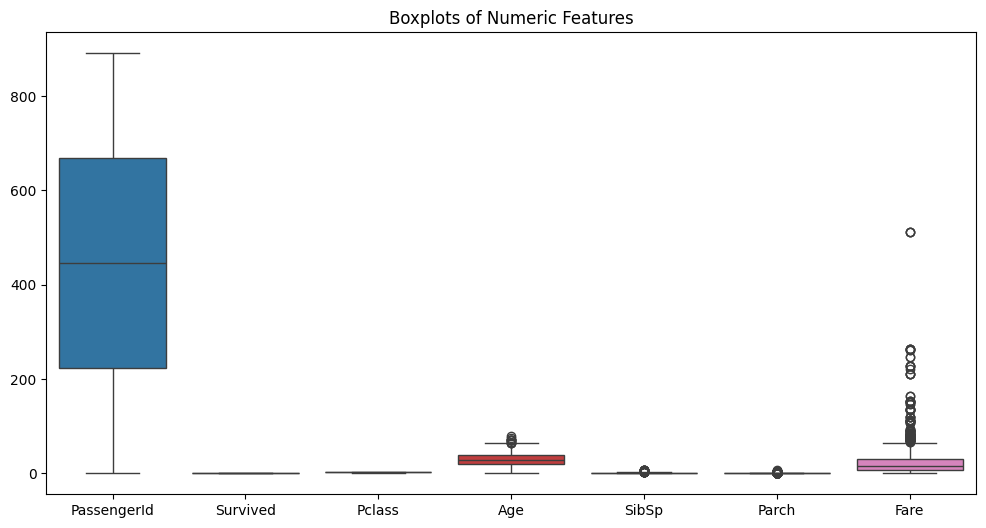

In [9]:
# 4. Boxplots for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplots of Numeric Features")
plt.show()

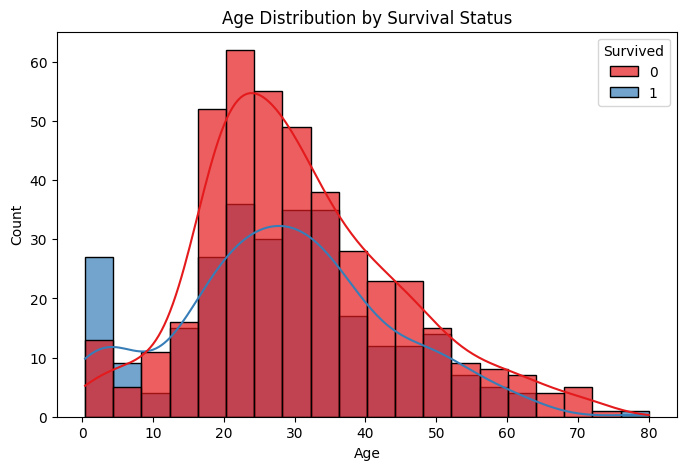

In [10]:
# Example: Age distribution by survival
if 'Age' in df.columns and 'Survived' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette='Set1', alpha=0.7)
    plt.title('Age Distribution by Survival Status')
    plt.show()

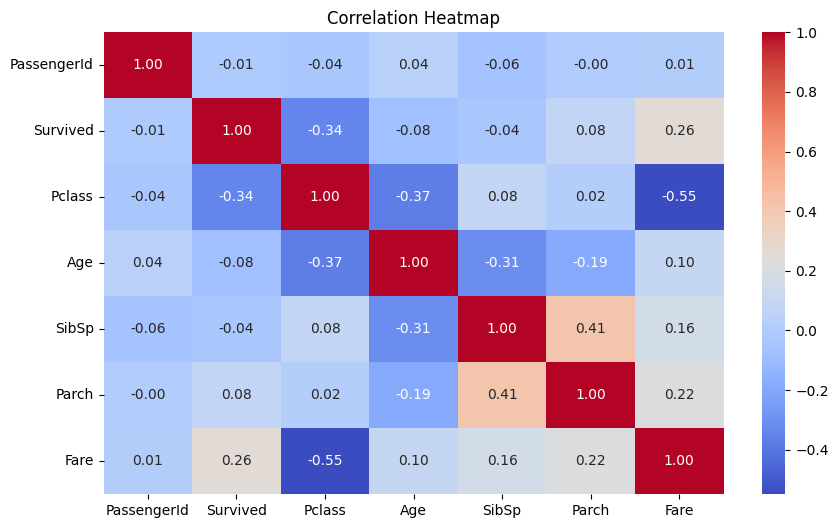

In [11]:
# 5. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

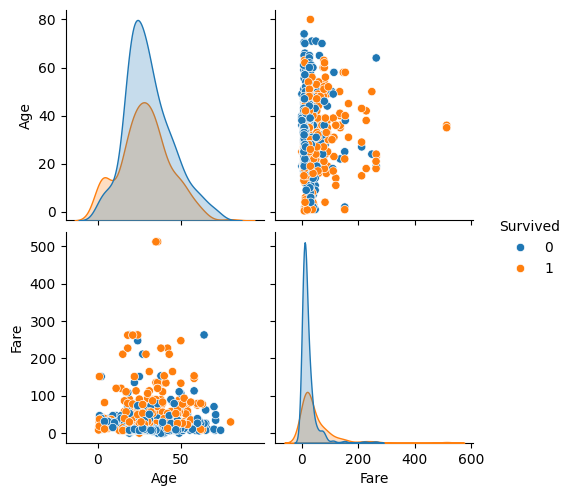

In [12]:
# 6. Pairplot (only selected features for clarity)
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue="Survived")
plt.show()


In [13]:
# Skewness Detection
print("\n SKEWNESS of Numeric Features:")
skewness = df[numeric_cols].skew()
print(skewness)
print("\nInterpretation:")
for col in numeric_cols:
    skew_val = skewness[col]
    if skew_val > 0.5:
        print(f" - {col}: Positively skewed (right tail)")
    elif skew_val < -0.5:
        print(f" - {col}: Negatively skewed (left tail)")
    else:
        print(f" - {col}: Approximately symmetric")


 SKEWNESS of Numeric Features:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Interpretation:
 - PassengerId: Approximately symmetric
 - Survived: Approximately symmetric
 - Pclass: Negatively skewed (left tail)
 - Age: Approximately symmetric
 - SibSp: Positively skewed (right tail)
 - Parch: Positively skewed (right tail)
 - Fare: Positively skewed (right tail)


In [15]:

# 7. Insights Example
df[df['Survived']==1]['Age'].mean()
print("Average Fare of Survivors:", df[df['Survived']==1]['Fare'].mean())
print("Survival Rate by Gender:\n", df.groupby("Sex")["Survived"].mean())


Average Fare of Survivors: 48.39540760233918
Survival Rate by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
